In [1]:
import pandas as pd
import numpy as np

import src.iodata as iodata
import src.preprocess as preproc
import src.markovchain as mchain
import src.visualize as visualize
from matplotlib import pyplot as plt

# XBTUSD

In [2]:
ticker = 'XBTUSD'
df = iodata.get_df(ticker)
# Time resolution is 1ms, so duplicate might occur, keep last.
df = df[~df.index.duplicated(keep='last')]
df['time'] = df['time'].dt.tz_localize(None)
df.index = df.index.tz_localize(None)
df.head(5)

,bs,bid,ask,as,time,mid,sprd,imb,wmid
timestamp,,,,,,,,,
2020-12-14 00:07:24.057,83434.0,19077.0,19077.5,890861.0,2020-12-14 00:07:24.057,19077.25,0.25,0.085635,19077.042818
2020-12-14 00:07:24.072,83434.0,19077.0,19077.5,902353.0,2020-12-14 00:07:24.072,19077.25,0.25,0.084637,19077.042318
2020-12-14 00:07:24.081,83434.0,19077.0,19077.5,906348.0,2020-12-14 00:07:24.081,19077.25,0.25,0.084295,19077.042148
2020-12-14 00:07:24.095,83434.0,19077.0,19077.5,911348.0,2020-12-14 00:07:24.095,19077.25,0.25,0.083872,19077.041936
2020-12-14 00:07:24.097,83434.0,19077.0,19077.5,917348.0,2020-12-14 00:07:24.097,19077.25,0.25,0.083369,19077.041684


In [3]:
n_imb = 10
n_spread = 3
dt = 1
ticker = 'XBTUSD'
df = iodata.get_df(ticker)
df, misc = preproc.discretize(df, n_imb, dt, n_spread)
df = preproc.mirror(df, misc)

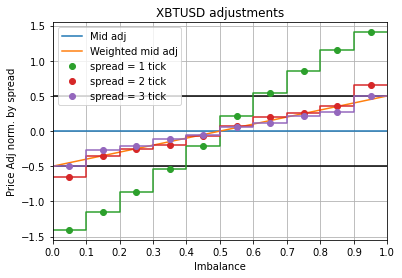

In [4]:
G1, B, Q, Q2, R1, R2, K = mchain.estimate(df)
Gstar, Bstar = mchain.calc_price_adj(G1, B, order='stationary')
visualize.plot_Gstar(ticker, Gstar, misc)

pmf(s = 1 tick) = 0.37
pmf(s = 2 tick) = 0.41
pmf(s = 3 tick) = 0.22


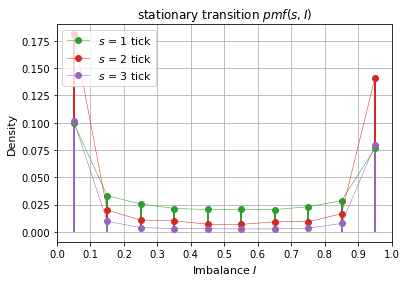

In [5]:
Bstar_pdf = Bstar.iloc[0]  # ~= np.linalg.matrix_power(B,10).iloc[0]
Bstar_pdf = pd.Series(np.linalg.matrix_power(B, 5)[0], index=B.columns)
visualize.plot_Bstar(Bstar_pdf, misc)